In [99]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_datareader as pdr

In [10]:
df=pdr.get_data_tiingo('GOOG',api_key=key)

In [11]:
df.to_csv('Google_stock_data.csv')

In [13]:
import pandas as pd
df1=pd.read_csv('Google_stock_data.csv')

In [14]:
df1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-08-22 00:00:00+00:00,772.15,774.5400,770.0502,773.27,951362,772.15,774.5400,770.0502,773.27,951362,0.0,1.0
1,GOOG,2016-08-23 00:00:00+00:00,772.08,776.4400,771.7850,775.48,928232,772.08,776.4400,771.7850,775.48,928232,0.0,1.0
2,GOOG,2016-08-24 00:00:00+00:00,769.64,774.5000,767.0700,770.58,1071999,769.64,774.5000,767.0700,770.58,1071999,0.0,1.0
3,GOOG,2016-08-25 00:00:00+00:00,769.41,771.8900,763.1846,767.00,926883,769.41,771.8900,763.1846,767.00,926883,0.0,1.0
4,GOOG,2016-08-26 00:00:00+00:00,769.54,776.0799,765.8500,769.00,1166681,769.54,776.0799,765.8500,769.00,1166681,0.0,1.0


In [16]:
df1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2021-08-12 00:00:00+00:00,2767.79,2768.36,2735.580,2754.26,732470,2767.79,2768.36,2735.580,2754.26,732470,0.0,1.0
1253,GOOG,2021-08-13 00:00:00+00:00,2768.12,2773.48,2760.100,2767.15,626348,2768.12,2773.48,2760.100,2767.15,626348,0.0,1.0
1254,GOOG,2021-08-16 00:00:00+00:00,2778.32,2779.81,2723.315,2760.00,902542,2778.32,2779.81,2723.315,2760.00,902542,0.0,1.0
1255,GOOG,2021-08-17 00:00:00+00:00,2746.01,2774.37,2735.750,2763.82,1063701,2746.01,2774.37,2735.750,2763.82,1063701,0.0,1.0
1256,GOOG,2021-08-18 00:00:00+00:00,2731.40,2765.88,2728.420,2742.31,746723,2731.40,2765.88,2728.420,2742.31,746723,0.0,1.0


In [20]:
df2=df.reset_index()['close']

In [23]:
df2.shape

(1257,)

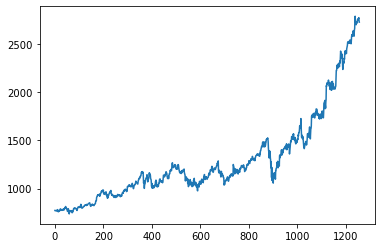

In [24]:
plt.plot(df2)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [27]:
df2.shape

(1257, 1)

In [29]:
print(df2)

[[0.01753687]
 [0.01750283]
 [0.01631653]
 ...
 [0.99291621]
 [0.97720742]
 [0.97010419]]


In [107]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [108]:
training_size,test_size


(817, 440)

In [109]:
train_data

array([[0.01753687],
       [0.01750283],
       [0.01631653],
       [0.01620471],
       [0.01626791],
       [0.01753687],
       [0.01604912],
       [0.0150573 ],
       [0.01589841],
       [0.01720139],
       [0.02139235],
       [0.02152362],
       [0.01907809],
       [0.01146435],
       [0.01601509],
       [0.01147894],
       [0.01284027],
       [0.01734725],
       [0.01594702],
       [0.01440094],
       [0.01717708],
       [0.01951566],
       [0.02485888],
       [0.02470816],
       [0.01853842],
       [0.02281689],
       [0.02211191],
       [0.01892737],
       [0.02003588],
       [0.0177362 ],
       [0.01961776],
       [0.01963721],
       [0.01982682],
       [0.0189614 ],
       [0.02424142],
       [0.02284606],
       [0.02433866],
       [0.02047345],
       [0.02063876],
       [0.02133401],
       [0.02877271],
       [0.03183571],
       [0.0296041 ],
       [0.03077095],
       [0.0374512 ],
       [0.03480633],
       [0.03062509],
       [0.028

In [110]:

def create_dataset(dataset,time_stamp=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_stamp-1):
        a=dataset[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(dataset[i + time_stamp,0])
    return np.array(dataX),np.array(dataY)

In [111]:
time_stamp=100
X_train,y_train=create_dataset(train_data,time_stamp)
X_test,y_test=create_dataset(test_data,time_stamp)

In [112]:
X_train.shape

(716, 100)

In [113]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [115]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [116]:
model.summary()
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='prediction.png', show_shapes=True,
#   show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
#   )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [117]:

#early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

In [124]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=70,verbose=1)

Epoch 1/100
11/11 [==============================] - 2s 222ms/step - loss: 2.6122e-04 - val_loss: 0.0081
Epoch 2/100
11/11 [==============================] - 2s 226ms/step - loss: 2.5842e-04 - val_loss: 0.0059
Epoch 3/100
11/11 [==============================] - 3s 229ms/step - loss: 2.6346e-04 - val_loss: 0.0108
Epoch 4/100
11/11 [==============================] - 2s 224ms/step - loss: 2.7472e-04 - val_loss: 0.0107
Epoch 5/100
11/11 [==============================] - 3s 231ms/step - loss: 2.8154e-04 - val_loss: 0.0077
Epoch 6/100
11/11 [==============================] - 2s 199ms/step - loss: 2.6099e-04 - val_loss: 0.0102
Epoch 7/100
11/11 [==============================] - 2s 218ms/step - loss: 2.4518e-04 - val_loss: 0.0105
Epoch 8/100
11/11 [==============================] - 2s 226ms/step - loss: 2.5334e-04 - val_loss: 0.0099
Epoch 9/100
11/11 [==============================] - 2s 226ms/step - loss: 2.4732e-04 - val_loss: 0.0135
Epoch 10/100
11/11 [==============================] - 2

In [125]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [126]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [127]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


1081.2332341365257

In [128]:
math.sqrt(mean_squared_error(y_test,test_predict))

1931.881543660068

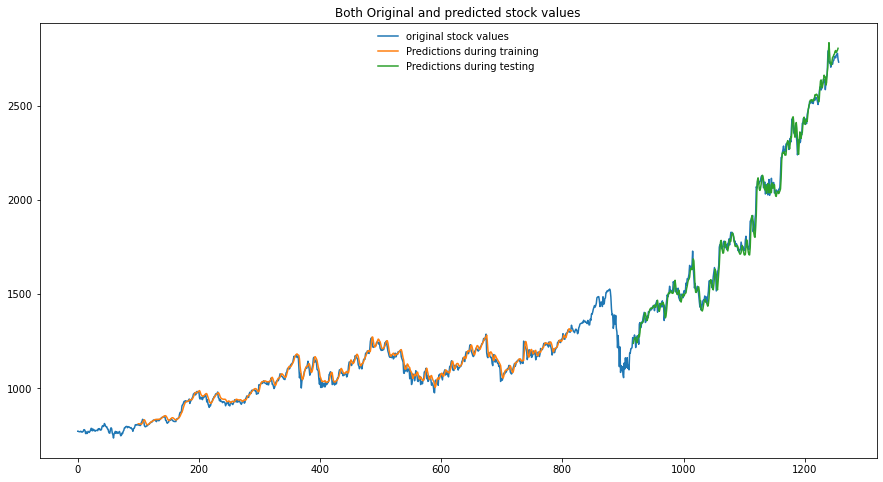

In [139]:
plt.figure(figsize=(15, 8))
plt.title("Both Original and predicted stock values")
look_back=100
trainPredictPlot=np.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df2)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df2),label='original stock values')
plt.plot(trainPredictPlot,label='Predictions during training')
plt.plot(testPredictPlot,label='Predictions during testing')
plt.legend(loc='upper center',frameon=False)
plt.show()


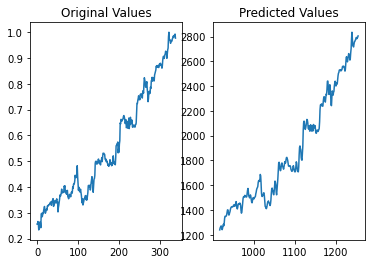

In [135]:
plt.subplot(1, 2, 1)
plt.plot(df2[len(train_predict)+(look_back*2)+1:len(df2)-1,:])
plt.title('Original Values')

plt.subplot(1, 2, 2)
plt.plot(testPredictPlot)
plt.title('Predicted Values')

plt.show()

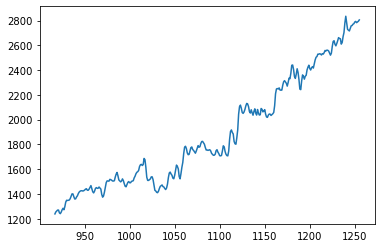

In [132]:
plt.plot(testPredictPlot)

In [140]:
from tensorflow.keras.models import save_model
save_model(model,"Google_Stock_Prediction.h5")